In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
import pathlib
new_path = pathlib.Path("/content/drive/My Drive/Plant Disease Detection/Potato")

In [ ]:
str(new_path)

'/content/drive/My Drive/Plant Disease Detection/Potato'

In [ ]:
IMAGE_SIZE = 128
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 25

In [ ]:
dataset_1_train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Plant Disease Detection/Apple/Train",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

dataset_1_val = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Plant Disease Detection/Apple/Val",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

dataset_1_test = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Plant Disease Detection/Apple/Test",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 7781 files belonging to 4 classes.
Found 1747 files belonging to 4 classes.
Found 196 files belonging to 4 classes.


In [ ]:
class_name_train = dataset_1_train.class_names
class_name_train

['Apple Scab', 'Black Rot', 'Cedar Apple Rust', 'Healthy']

In [ ]:
class_name_val = dataset_1_val.class_names
class_name_val

['Apple Scab', 'Black Rot', 'Cedar Apple Rust', 'Healthy']

In [ ]:
class_name_test = dataset_1_test.class_names
class_name_test

['Apple Scab', 'Black Rot', 'Cedar Apple Rust', 'Healthy']

In [ ]:
len(dataset_1_train), len(dataset_1_val), len(dataset_1_test),

(244, 55, 7)

In [ ]:
for image_batch, label_batch in dataset_1_train.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 128, 128, 3)
[1 2 2 3 0 3 1 0 1 2 3 3 2 2 2 1 3 3 0 3 0 3 1 0 1 2 1 0 1 1 3 1]


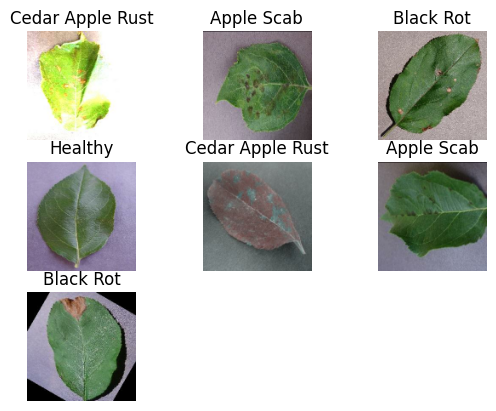

In [ ]:
for image_batch, label_batch in dataset_1_train.take(1):
  # plt.imshow(image_batch[0])
  for i in range(7):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_name_train[label_batch[i]])
    plt.axis("off")

In [ ]:
len(dataset_1_train)

244

In [ ]:
dataset_1_train = dataset_1_train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
dataset_1_val = dataset_1_val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
dataset_1_test = dataset_1_test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation= tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomCrop(height=180, width=180),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

In [ ]:
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax")
])

model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (32, 180, 180, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 90, 90, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (32, 90, 90, 64)          18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (32, 45, 45, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(dataset_1_train, epochs=25, batch_size=BATCH_SIZE, verbose=1, validation_data=dataset_1_val)

Epoch 1/25
244/244 [==============================] - 868s 4s/step - loss: 0.8917 - accuracy: 0.6078 - val_loss: 0.4694 - val_accuracy: 0.8105
Epoch 2/25
244/244 [==============================] - 627s 3s/step - loss: 0.4215 - accuracy: 0.8367 - val_loss: 0.2510 - val_accuracy: 0.8981
Epoch 3/25
244/244 [==============================] - 636s 3s/step - loss: 0.2553 - accuracy: 0.8989 - val_loss: 0.1249 - val_accuracy: 0.9496
Epoch 4/25
244/244 [==============================] - 633s 3s/step - loss: 0.1811 - accuracy: 0.9343 - val_loss: 0.1120 - val_accuracy: 0.9571
Epoch 5/25
244/244 [==============================] - 625s 3s/step - loss: 0.1214 - accuracy: 0.9562 - val_loss: 0.1290 - val_accuracy: 0.9525
Epoch 6/25
244/244 [==============================] - 630s 3s/step - loss: 0.1076 - accuracy: 0.9631 - val_loss: 0.0474 - val_accuracy: 0.9823
Epoch 7/25
244/244 [==============================] - 629s 3s/step - loss: 0.1043 - accuracy: 0.9629 - val_loss: 0.0501 - val_accuracy: 0.9811

In [ ]:
score = model.evaluate(dataset_1_test)

7/7 [==============================] - 30s 514ms/step - loss: 0.0100 - accuracy: 0.9949


In [ ]:
score

[0.010005464777350426, 0.9948979616165161]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 244}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
len(history.history["accuracy"])

25

Text(0.5, 1.0, 'Training and Validation Loss')

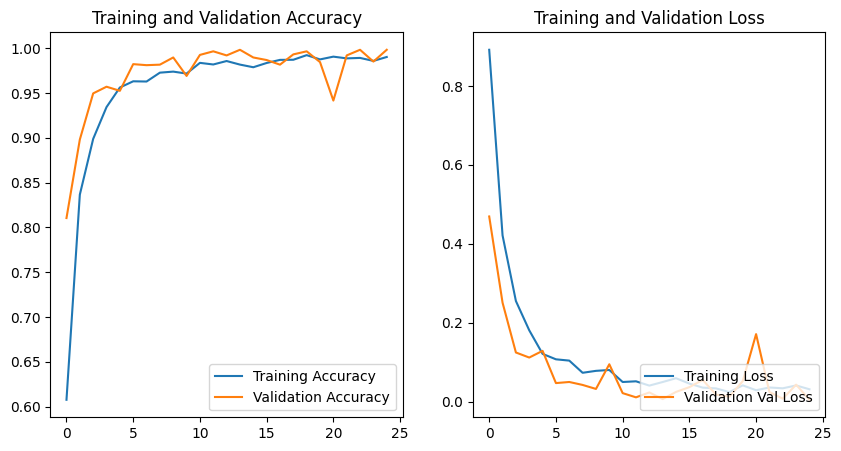

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), history.history["accuracy"], label="Training Accuracy")
plt.plot(range(EPOCHS), history.history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), history.history["loss"], label="Training Loss")
plt.plot(range(EPOCHS), history.history["val_loss"], label="Validation Val Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")

First image is Apple Scab
1/1 [==============================] - 1s 630ms/step
First image is Apple Scab


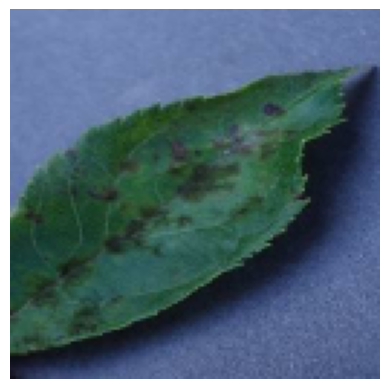

In [ ]:
for image_batch, image_label in dataset_1_test.take(1):
  first_image = image_batch[0].numpy().astype("uint8")
  first_label = class_name_test[image_label[0].numpy()]

  print(f"First image is {first_label}")
  predicted_images = model.predict(image_batch)
  print(f"First image is {class_name_test[np.argmax(predicted_images[0])]}")
  plt.imshow(first_image)
  plt.axis("off")

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name_test[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 42ms/step


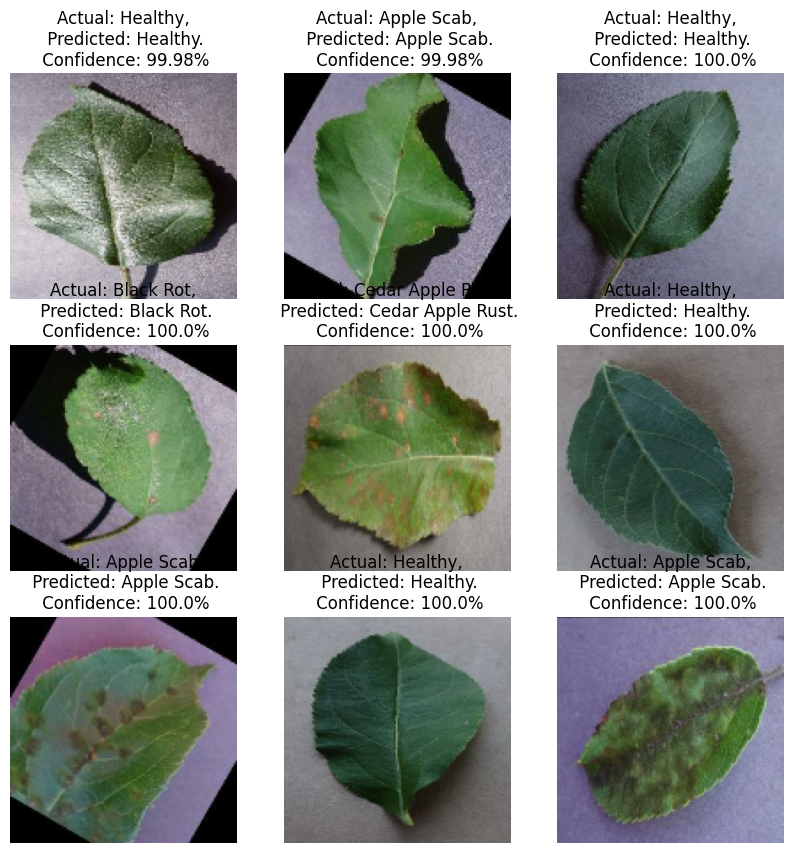

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in dataset_1_test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name_test[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
path = "/content/drive/My Drive/AppleLeaf Disease Detection/Apple_Leaf_Disease_detection.h5"

In [ ]:
model.save(path)

In [ ]:
new_model = tf.keras.models.load_model(path)
new_model

1/1 [==============================] - 0s 35ms/step


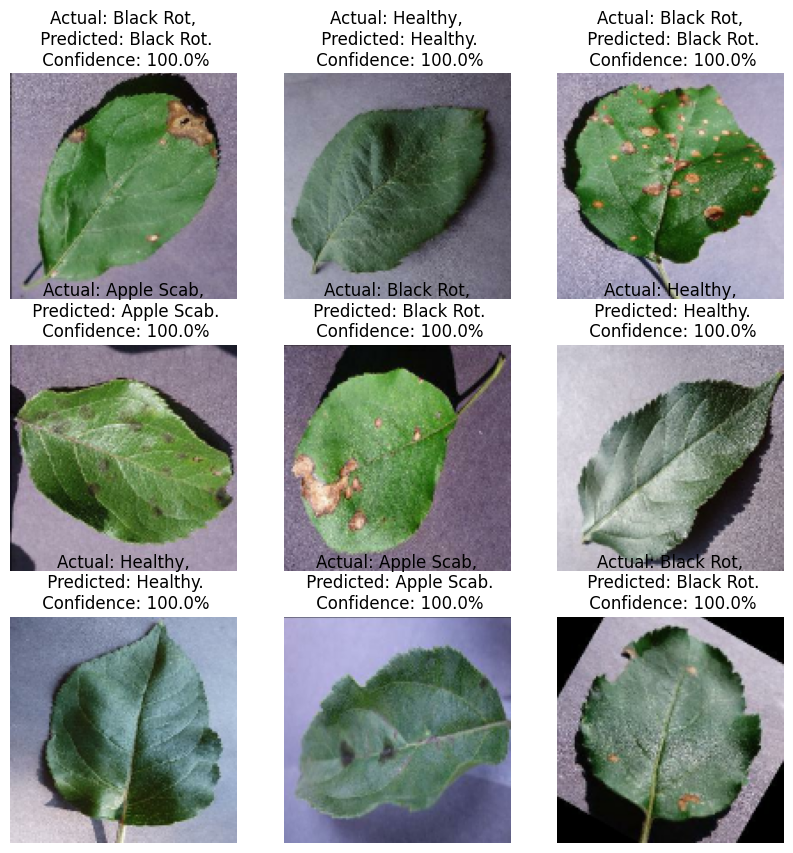

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in dataset_1_test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(new_model, images[i].numpy())
        actual_class = class_name_test[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")